In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
# Load dataset
data = pd.read_csv('Telco-Customer-Churn.csv')

In [32]:
# Handle missing values
data.bfill(inplace=True)

In [33]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [34]:
# Scale numerical variables
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [35]:
# Split the data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

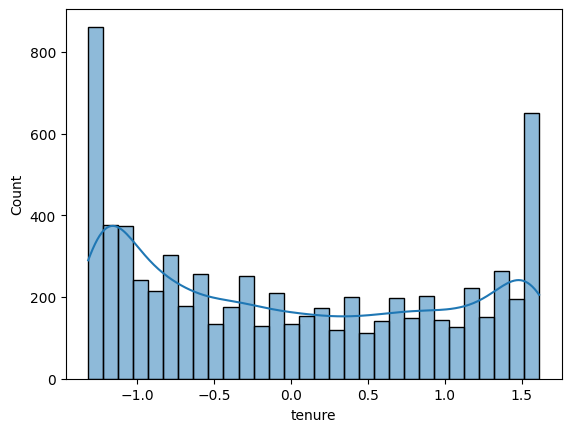

In [37]:

# Plot distributions of numerical features
sns.histplot(data['tenure'], bins=30, kde=True)
plt.show()

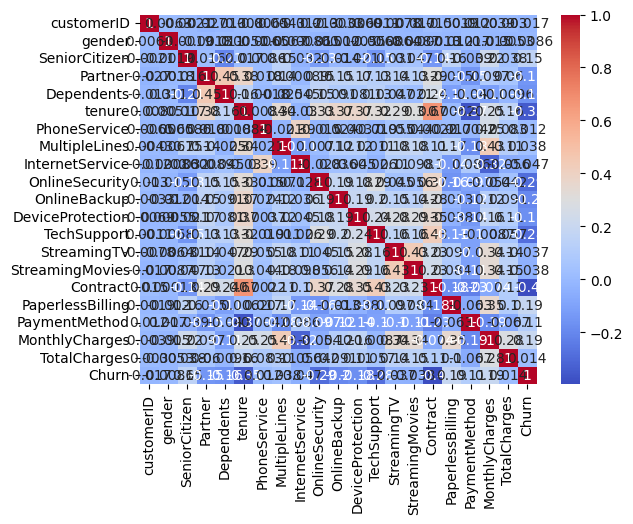

In [38]:

# Plot correlations
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [39]:


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [40]:
# Creating a pipeline to scale the data and apply logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Scale the data
    ('log_reg', LogisticRegression(max_iter=200, solver='lbfgs'))  # Step 2: Logistic regression with increased max_iter
])



In [41]:
# Fit the model on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=200))])

In [42]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)


In [43]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[940  96]
 [165 208]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve




In [45]:
# ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')


ROC AUC: 0.86


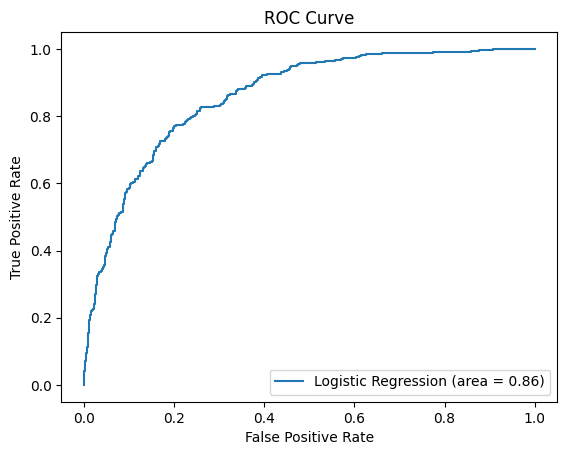

In [46]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()